In [62]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [63]:
mnist = loadmat("mnist")
Train_Data = mnist['train']
Test_Data = mnist['test']

<font color='green'>
Separating x and y :
</font>

In [64]:
#separate x and y in train data
X_train_without_intercept = Train_Data[ : , :-1]
y_train_notOnehot = Train_Data[ : , -1]

#separate x and y in test data
X_test_without_intercept = Test_Data[ : , :-1]
y_test_notOnehot = Test_Data[ : , -1]

#number of classes and train data
n_class = len(np.unique(y_train_notOnehot))
n_train_data = len(Train_Data)


<font color='green'>
define a function for change y to OneHot form :
</font>

In [65]:
def OneHot(y):
    oneHot_y = np.zeros( ( len(y) , len(np.unique(y)) ) )
    
    for idx , c in enumerate(y) :
        oneHot_y[idx ,int(c)] = 1
    
    return oneHot_y


<font color='green'>
Add intercept (x(0) = 1) and  implement OneHot function on both Y_train and:
</font>

In [66]:
##### train data #####
# add x0 = 1 to all x rows
number_of_rows = len(Train_Data)
intercept = np.ones(number_of_rows)
X_train = np.c_[intercept , X_train_without_intercept]

# turn y's to onehot form
y_train = OneHot(y_train_notOnehot)

##### test data #####
# add x0 = 1 to all x rows
number_of_rows = len(Test_Data)
intercept = np.ones(number_of_rows)
X_test = np.c_[intercept , X_test_without_intercept]

# turn y's to onehot form
y_test = OneHot(y_test_notOnehot)

<font color='green'>
defining prediction and accuracy function :
</font>

In [73]:

def predict(X,w):
    def soft_max(mat):
        soft_max = np.zeros(mat.shape)
        for idx_r , row in enumerate(mat):
            denominator = sum(np.exp(row))
            for idx , el in enumerate(row):
                soft_max[idx_r , idx] = np.exp(el) / denominator
        return soft_max
        

    prediction = np.zeros( (len(X) , n_class ) )
    SoftMax = soft_max(X @ w)
    for idx in range( len(X) ):
    
        prediction[idx , np.argmax(SoftMax[idx])] = 1
    return prediction

def Accuracy(y_true, y_pred):
    accuracy = np.sum(np.argmax(y_true,axis=1) == np.argmax(y_pred , axis=1)) / len(y_true)
    return accuracy


<font color='green'>
defining Logistic Regressin function :
</font>

In [68]:
def LogisticRegression( X , y , learning_rate = 0.01 , lam=0.001 , n_iters=100):
    
    #initialization w
    w = np.zeros((len(X[0]) , len(np.unique(y_train_notOnehot))))
    
    iteration_lst = []
    Accuracy_at_each_iteration_lst = []

    for iter in range(n_iters):
        
        w = w - learning_rate * ( lam*w + ( X.T @ (predict(X,w)-y) ) )
        iteration_lst.append(iter)
        Accuracy_at_each_iteration_lst.append(Accuracy(y_train , predict(X_train , w )))

    return w , iteration_lst , Accuracy_at_each_iteration_lst

<font color='green'>
10 fold cv for determine best lambda :
</font>

In [79]:

for lmd in [ 1 , 0.5 , 0.25 , 0.1 , 0.01 , 0.001 , 0]:
    fold_size = int(len(X_train)/10)
    print("lambda is : ",lmd)
    sum_of_accuracies = 0
    for fold in range(10):
        if fold == 0  :
            Temp_X_train = X_train[fold_size: ]
            Temp_y_train = y_train[fold_size: ]
            X_val = X_train[ : fold_size]
            y_val = y_train[ : fold_size]
        elif fold == 9 :
            Temp_X_train = X_train[ :9*fold_size]
            Temp_y_train = y_train[ :9*fold_size]
            X_val = X_train[9*fold_size: ]
            y_val = y_train[9*fold_size: ]
        else :
            Temp_X_train = np.concatenate((X_train[ :fold * fold_size ],X_train[ (fold+1)*fold_size :]))
            Temp_y_train = np.concatenate((y_train[ :fold * fold_size ],y_train[ (fold+1)*fold_size :]))
            X_val = X_train[ fold * fold_size: (fold+1)*fold_size]
            y_val = y_train[ fold * fold_size: (fold+1)*fold_size]
       
        temp_w = LogisticRegression( Temp_X_train , Temp_y_train , learning_rate = 0.001 , lam=lmd , n_iters=20)[0]
        temp_pred = predict(X_val , temp_w)
        sum_of_accuracies += Accuracy(y_val , temp_pred)
    print( "Model Accuracy With This lambda is : " , sum_of_accuracies/10)
    

lambda is :  1
Model Accuracy With This lambda is :  0.842375
lambda is :  0.5
Model Accuracy With This lambda is :  0.8563750000000001
lambda is :  0.25
Model Accuracy With This lambda is :  0.8606250000000001
lambda is :  0.1
Model Accuracy With This lambda is :  0.8581249999999999
lambda is :  0.01
Model Accuracy With This lambda is :  0.858125
lambda is :  0.001
Model Accuracy With This lambda is :  0.858125
lambda is :  0
Model Accuracy With This lambda is :  0.858


<font color='green'>
best lambda is : 0.25

so i fitting the model with this lambda :
</font>

In [80]:
w_star,iteration_lst,Accuracy_at_each_iteration_lst = LogisticRegression( X_train , y_train , learning_rate = 0.001 , lam=0.5 , n_iters=100)

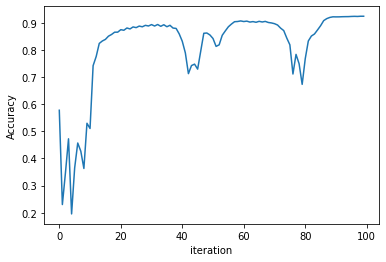

In [81]:
plt.xlabel("iteration")
plt.ylabel("Accuracy")
plt.plot(iteration_lst , Accuracy_at_each_iteration_lst)

In [82]:
print("Accuracy On Test Data : ",Accuracy(y_test ,predict(X_test , w_star)) * 100 , "Percent")

Accuracy On Test Data :  89.64999999999999 Percent
